In [5]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
import jax
from src import icvf_learner as learner
from src.icvf_networks import icvfs, create_icvf
from flax.serialization import from_state_dict
import numpy as np
import pickle
import matplotlib.animation as animation 
#import html
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from scipy.stats import multivariate_normal

In [42]:
model_paths = {
    'icvf_gamma0990': "/nfs/kun2/users/dashora7/antmaze-large-icvf.pkl",
    'icvf_path_0995': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_multilinear_antmaze-large-diverse-v2_20240116_173911/params.pkl",
    'icvf_path_0999_earlyckpt': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_multilinear_antmaze-large-diverse-v2_20240117_122151/step_400000_params.pkl",
    'icvf_path_0999_big': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_multilinear_antmaze-large-diverse-v2_20240117_130954/step_500000_params.pkl',
    
    # Good
    'icvf_path_0999_big_mono': '/nfs/kun2/users/dashora7/icvf-runs/icvf_monolithic_antmaze-large-diverse-v2_20240117_165352/step_600000_params.pkl',
    
    'icvf_zz_0999_big_mono': '/nfs/kun2/users/dashora7/icvf-runs/icvf_monolithic_antmaze-large-diverse-v2_20240126_185337/step_400000_params.pkl',
    'icvf_path_0999_big_mono_quasi': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_135902/step_200000_params.pkl',
    'icvf_path_0999_big_mono_quasitune': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_153659/step_200000_params.pkl',
    'bigmono_quasiw01': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_155836/step_600000_params.pkl",
    
    # Good
    'bigmono_quasiw025': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_160430/step_200000_params.pkl",
    
    'bigmono_quasiw02c2': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_165058/step_700000_params.pkl",
    'bigmono_quasiw025c2': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240129_170127/step_500000_params.pkl",
   
    'bigmono_stopzz': "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_162050/step_400000_params.pkl",
    
    'bigmono_tau099': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_134540/step_200000_params.pkl',
    'bigmono_tau05': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_135538/step_400000_params.pkl',
    'bigmono_tau095': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_141212/step_600000_params.pkl',
    'bigmono_tau090': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_145056/step_900000_params.pkl',
    'icvf_path_0999_huge_mono': '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240130_173109/step_1000000_params.pkl',
    
    # discrete, Good!
    "icvf_path_0999_big_mono_disc80bin": '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240201_122706/step_600000_params.pkl',
    "icvf_path_0999_big_mono_disc80bin_QM025": '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240201_132413/step_600000_params.pkl',
    "icvf_path_0999_big_mono_disc80bin_QM000": '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240202_152550/step_500000_params.pkl',
    "icvf_path_0999_big_mono_disc80bin_QM015": '/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_monolithic_antmaze-large-diverse-v2_20240202_152631/step_200000_params.pkl'
    
}
# model_name = 'icvf_zz_0999_big_mono'
# model_name = 'icvf_path_0999_big_mono'
# model_name = 'icvf_path_0999_big_mono_quasitune'

# model_name = "bigmono_tau095"
model_name = "icvf_path_0999_big_mono_disc80bin_QM000"

# model_name = "bigmono_stopzz"


# model_name = 'icvf_path_0999_big_mono'



icvf_path = model_paths[model_name]

# icvf_path = "/home/dashora7/icvf_release/experiment_output/icvf_antmaze/icvf/icvf_multilinear_antmaze-large-diverse-v2_20240117_122151/step_300000_params.pkl"
assert icvf_path is not None, "Need to provide path to ICVF model!"    
with open(icvf_path, 'rb') as f:
    icvf_params = pickle.load(f)

params = icvf_params['agent']
conf = icvf_params['config']

if 'big' in model_name:
    hidden_dims = [512, 512, 512]
elif 'huge' in model_name:
    hidden_dims = [1024, 1024, 1024, 1024]
else:
    hidden_dims = [256, 256]

if 'mono' in model_name:
    model_type = 'monolithic'
else:
    model_type = 'multilinear'
    
value_def = create_icvf(model_type, hidden_dims=hidden_dims)

agent = learner.create_learner(
    seed=42, observations=np.ones((1, 29)),
    value_def=value_def, **conf)
agent = from_state_dict(agent, params)

def icvf_repr_fn(obs):
    return agent.value(obs, method='get_phi')
def icvf_value_fn(obs, goal):
    return -1 * agent.value(obs, goal, goal).mean(0)
def icvf_full(obs, outcome, goal):
    return -1 * agent.value(obs, outcome, goal).mean(0)

def test_func(grid, goal):
    return np.prod(grid[..., :2], axis=-1)

state_repr_func = jax.jit(icvf_repr_fn)
value_fn = jax.jit(icvf_value_fn)
full_fn = jax.jit(icvf_full)

fpath = '/nfs/kun2/users/dashora7/hard_antmaze.hdf5'
data = h5py.File(fpath, 'r')
obses = data['observations']
obses = np.array(obses)
mean = np.mean(obses, axis=0)
cov = np.cov(obses, rowvar=False)
mvn = multivariate_normal(mean=mean, cov=cov)


Extra kwargs: {}


In [43]:
# create a grid of points
W, H = 40, 30
x = np.linspace(0, 40, W)
y = np.linspace(0, 30, H)
goal = np.zeros((1, 29))
start = np.zeros((1, 29))


goal[:, :2] = np.array([36, 24])
# goal[:, :2] = np.array([22, 2])
start[:, :2] = np.array([2, 2])


X, Y = np.meshgrid(x, y)
# Stack the X and Y grids to a 2-dimensional grid
grid = np.stack((X, Y), axis=-1)
# add random samples 3rd dimension of grid to expand to 29
samples = mvn.rvs(size=H*W)[..., 2:]
# samples = np.zeros((H, W, 27))
grid = np.concatenate((grid, samples.reshape((H, W, 27))), axis=-1)
# flatten and pass to ICVF, then reshape
grid = grid.reshape(-1, 29)
goal = goal.repeat(grid.shape[0], axis=0)
start = start.repeat(grid.shape[0], axis=0)
# grid = -1 * value_fn(grid, goal)
print(grid.shape, goal.shape, start.shape)
grid = -1 * full_fn(grid, goal, goal)
grid = grid.reshape(H, W)
# grid = np.flip(grid.reshape(H, W), axis=0)

(1200, 29) (1200, 29) (1200, 29)


(30, 40)


Text(0.5, 1.0, 'V(s, x, g) vs. x')

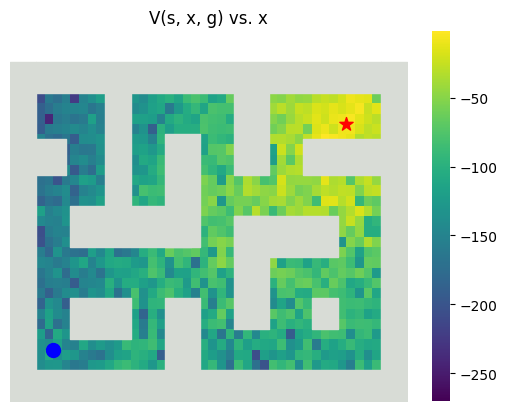

In [44]:
print(grid.shape)
sns.heatmap(grid, cmap='viridis')
# set plt extent
plt.xlim([-3, 43])
plt.ylim([-3, 33])
plt.scatter([goal[0][0]], [goal[0][1]], marker='*', s=100, color='red')
plt.scatter([start[0][0]], [start[0][1]], s=100, color='blue')
# plot squares of maze
plt.fill_between([-3, 0], [-4, -4], [30, 30], color='xkcd:light grey')
plt.fill_between([40, 43], [-4, -4], [30, 30], color='xkcd:light grey')
plt.fill_between([0, 40], [27, 27], [30, 30], color='xkcd:light grey')
plt.fill_between([0, 40], [-4, -4], [0, 0], color='xkcd:light grey')
plt.fill_between([15, 19], [-1, -1], [7, 7], color='xkcd:light grey')
plt.fill_between([4, 11], [3, 3], [7, 7], color='xkcd:light grey')
plt.fill_between([0, 3.5], [19, 19], [22.5, 22.5], color='xkcd:light grey')
plt.fill_between([8, 11], [16, 16], [28, 28], color='xkcd:light grey')
plt.fill_between([4, 18], [12, 12], [16, 16], color='xkcd:light grey')
plt.fill_between([15, 19], [12, 12], [23, 23], color='xkcd:light grey')
plt.fill_between([23, 27], [19, 19], [29, 29], color='xkcd:light grey')
plt.fill_between([23, 27], [4, 4], [15, 15], color='xkcd:light grey')
plt.fill_between([23, 35], [11, 11], [15, 15], color='xkcd:light grey')
plt.fill_between([32, 35], [4, 4], [7, 7], color='xkcd:light grey')
plt.fill_between([31, 40], [19, 19], [22.5, 22.5], color='xkcd:light grey')
# remove axis labels
plt.axis('off')
# add title

# V(s, g, g) is not good potentially

plt.title('V(s, x, g) vs. x')

optimal steps 153.43546
expected steps range: 129.48872 371.33185
The error should be strictly positive if quasimetric!
The min is -23.946732
The median is 53.96057
The percent of subgoals with negative error is 2.25


(-3.0, 43.0, -3.0, 33.0)

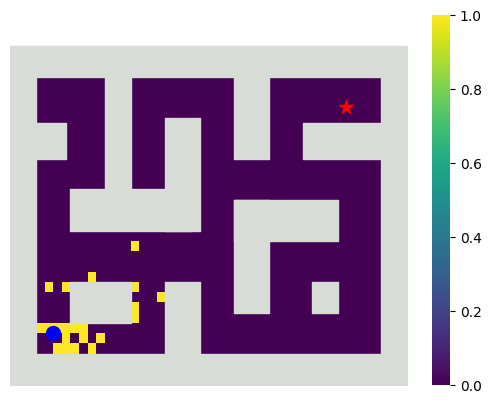

In [45]:
# Get grid of points. 
W, H = 40, 30
x = np.linspace(0, 40, W)
y = np.linspace(0, 30, H)
goal = np.zeros((1, 29))
start = np.zeros((1, 29))

goal[:, :2] = np.array([36, 24])
start[:, :2] = np.array([2, 2])

X, Y = np.meshgrid(x, y)
# Stack the X and Y grids to a 2-dimensional grid
grid = np.stack((X, Y), axis=-1)
# add random samples 3rd dimension of grid to expand to 29
samples = mvn.rvs(size=H*W)[..., 2:]
grid = np.concatenate((grid, samples.reshape((H, W, 27))), axis=-1)
# flatten and pass to ICVF, then reshape
grid = grid.reshape(-1, 29)
goal = goal.repeat(grid.shape[0], axis=0)
start = start.repeat(grid.shape[0], axis=0)

steps_to_sg = full_fn(start, grid, grid)
steps_from_sg = full_fn(grid, goal, goal)
expected_steps = steps_to_sg + steps_from_sg
optimal_steps = full_fn(start, goal, goal)
error = expected_steps - optimal_steps
print("optimal steps", optimal_steps[0])
print("expected steps range:", np.min(expected_steps), np.max(expected_steps))
print("The error should be strictly positive if quasimetric!")
print("The min is", np.min(error))
print("The median is", np.median(error))
# get percent of subgoals that have negative error
print("The percent of subgoals with negative error is", 100 * (np.sum(error < 0) / error.shape[0]))
scores = -1 * error

# apply relu to scores
scores = np.maximum(scores, 0)
# make nonzero scores 1
scores[scores > 0] = 1

scores = scores.reshape(H, W)
sns.heatmap(scores, cmap='viridis')
plt.xlim([-3, 43])
plt.ylim([-3, 33])
plt.scatter([goal[0][0]], [goal[0][1]], marker='*', s=100, color='red')
plt.scatter([start[0][0]], [start[0][1]], s=100, color='blue')
# plot squares of maze
plt.fill_between([-3, 0], [-4, -4], [30, 30], color='xkcd:light grey')
plt.fill_between([40, 43], [-4, -4], [30, 30], color='xkcd:light grey')
plt.fill_between([0, 40], [27, 27], [30, 30], color='xkcd:light grey')
plt.fill_between([0, 40], [-4, -4], [0, 0], color='xkcd:light grey')
plt.fill_between([15, 19], [-1, -1], [7, 7], color='xkcd:light grey')
plt.fill_between([4, 11], [3, 3], [7, 7], color='xkcd:light grey')
plt.fill_between([0, 3.5], [19, 19], [22.5, 22.5], color='xkcd:light grey')
plt.fill_between([8, 11], [16, 16], [28, 28], color='xkcd:light grey')
plt.fill_between([4, 18], [12, 12], [16, 16], color='xkcd:light grey')
plt.fill_between([15, 19], [12, 12], [23, 23], color='xkcd:light grey')
plt.fill_between([23, 27], [19, 19], [29, 29], color='xkcd:light grey')
plt.fill_between([23, 27], [4, 4], [15, 15], color='xkcd:light grey')
plt.fill_between([23, 35], [11, 11], [15, 15], color='xkcd:light grey')
plt.fill_between([32, 35], [4, 4], [7, 7], color='xkcd:light grey')
plt.fill_between([31, 40], [19, 19], [22.5, 22.5], color='xkcd:light grey')
plt.axis('off')